In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Training_Data.csv')
df.head()

,Unnamed: 0,FarmerCropId,pixel,0,20,40,60,80,100,120,140,160,180,Class
0,0,Forest_11,P_1248,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005,Forest
1,1,Forest_8,P_4942,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456,Forest
2,2,Urban_21,P_2341,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926,Urban
3,3,Forest_0,P_1902,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766,Forest
4,4,Urban_14,P_261,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413,Urban


In [3]:
features = ['0','20','40','60','80','100','120','140','160','180','Class']
ddf = df[features]                                                 
ddf = ddf[ddf.isnull().sum(axis=1) < 3]               #Dropping the rows where NaN values are 4 or more times
new_df = ddf['Class']
ddf = ddf[features[:len(features)-1]].apply(lambda row:row.fillna(row.mean()),axis=1) #Imputing the leftover rows containing NaN 
ddf.head()                                                                            #values with the mean of the row

,0,20,40,60,80,100,120,140,160,180
0,0.688329,0.329046,0.594767,0.541278,0.273226,0.395824,0.502067,0.431720,0.297808,0.274005
1,0.762895,0.315333,0.641736,0.639904,0.572348,0.514314,0.639383,0.588162,0.453102,0.370456
2,0.110929,0.077010,0.075400,0.056988,0.065011,0.076522,0.114804,0.076841,0.120840,0.070926
3,0.693700,0.264101,0.501765,0.515265,0.371811,0.322581,0.487982,0.480932,0.436844,0.374766
4,0.112433,0.049106,0.026482,0.049207,0.049906,0.097688,0.134807,0.102053,0.141696,0.089413


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
x = np.array(ddf)
le = LabelEncoder()                                 #Encoding the labels
y = le.fit_transform(new_df)
print(le.classes_)
y = y.reshape(len(y), 1)
enc = OneHotEncoder(categories='auto',sparse=False)    #One-hot encoding the encoded labels 
y = enc.fit_transform(y)
print(enc.categories_)
print(x.shape,y.shape)

['Barren' 'Forest' 'Urban' 'Water']
[array([0, 1, 2, 3])]
(17510, 10) (17510, 4)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, shuffle=True)
clf = RandomForestClassifier(max_depth=2, n_estimators = 10, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.mean_absolute_error(y_test, y_pred)

0.0142188213796254

In [6]:
clf.score(X_test, y_test)                      #Checking if the model performs well

0.9705344906349932

In [7]:
df_0 = pd.read_csv('0.csv')
df_0['20'] = pd.read_csv('20.csv')['z']
df_0['40'] = pd.read_csv('40.csv')['z']
df_0['60'] = pd.read_csv('60.csv')['z']
df_0['80'] = pd.read_csv('80.csv')['z']
df_0['100'] = pd.read_csv('100.csv')['z']
df_0['120'] = pd.read_csv('120.csv')['z']
df_0['140'] = pd.read_csv('140.csv')['z']
df_0['160'] = pd.read_csv('160.csv')['z']
df_0['180'] = pd.read_csv('180.csv')['z']
df_0.head()

,x,y,z,20,40,60,80,100,120,140,160,180
0,702347.506354,3.365528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,702357.506354,3.365528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,702367.506354,3.365528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,702377.506354,3.365528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,702387.506354,3.365528e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_new = df_0.drop(columns=['x','y'])

In [9]:
df_new.shape

(1794924, 10)

In [10]:
df_new = df_new.dropna()                                   #Dropping rows with NaN values
df_new.columns = features[:len(features)-1]
df_new = df_new.reset_index()
df_new.head()

,index,0,20,40,60,80,100,120,140,160,180
0,539,0.329490,0.353315,0.258779,0.342197,0.399738,0.222735,0.473115,0.501271,0.392103,0.384102
1,540,0.354627,0.278580,0.290514,0.345183,0.323568,0.235906,0.477826,0.507898,0.513125,0.420290
2,1904,0.301011,0.265335,0.232849,0.487637,0.466070,0.244964,0.683130,0.694568,0.552731,0.468364
3,1905,0.310408,0.334209,0.309813,0.345968,0.374498,0.234447,0.483351,0.528928,0.421143,0.378261
4,1906,0.411095,0.377117,0.302578,0.321477,0.315098,0.236452,0.514286,0.498550,0.521564,0.420126


In [11]:
dfn = df_new.drop(columns='index')
test_x = np.array(dfn)
pred = clf.predict(test_x)

In [12]:
new=[]
for i in pred:
    new.append(enc.inverse_transform([i]).astype(int)[0][0])    #Creating a list of predicted output labels

In [13]:
df_new['Class'] = new
df_new.set_index('index', inplace = True)
df_new.head()

,0,20,40,60,80,100,120,140,160,180,Class
index,,,,,,,,,,,
539,0.329490,0.353315,0.258779,0.342197,0.399738,0.222735,0.473115,0.501271,0.392103,0.384102,1
540,0.354627,0.278580,0.290514,0.345183,0.323568,0.235906,0.477826,0.507898,0.513125,0.420290,1
1904,0.301011,0.265335,0.232849,0.487637,0.466070,0.244964,0.683130,0.694568,0.552731,0.468364,1
1905,0.310408,0.334209,0.309813,0.345968,0.374498,0.234447,0.483351,0.528928,0.421143,0.378261,1
1906,0.411095,0.377117,0.302578,0.321477,0.315098,0.236452,0.514286,0.498550,0.521564,0.420126,1


In [14]:
df_0 = pd.read_csv('0.csv')
df_0 = df_0.drop(columns='z')
dft = pd.concat([df_0,df_new['Class']],axis=1,sort=False)
dft.columns = ['x','y','z']

In [15]:
dft.shape

(1794924, 3)

In [16]:
dft.z.value_counts()

1.0    562318
0.0    227217
2.0    107823
3.0        13
Name: z, dtype: int64

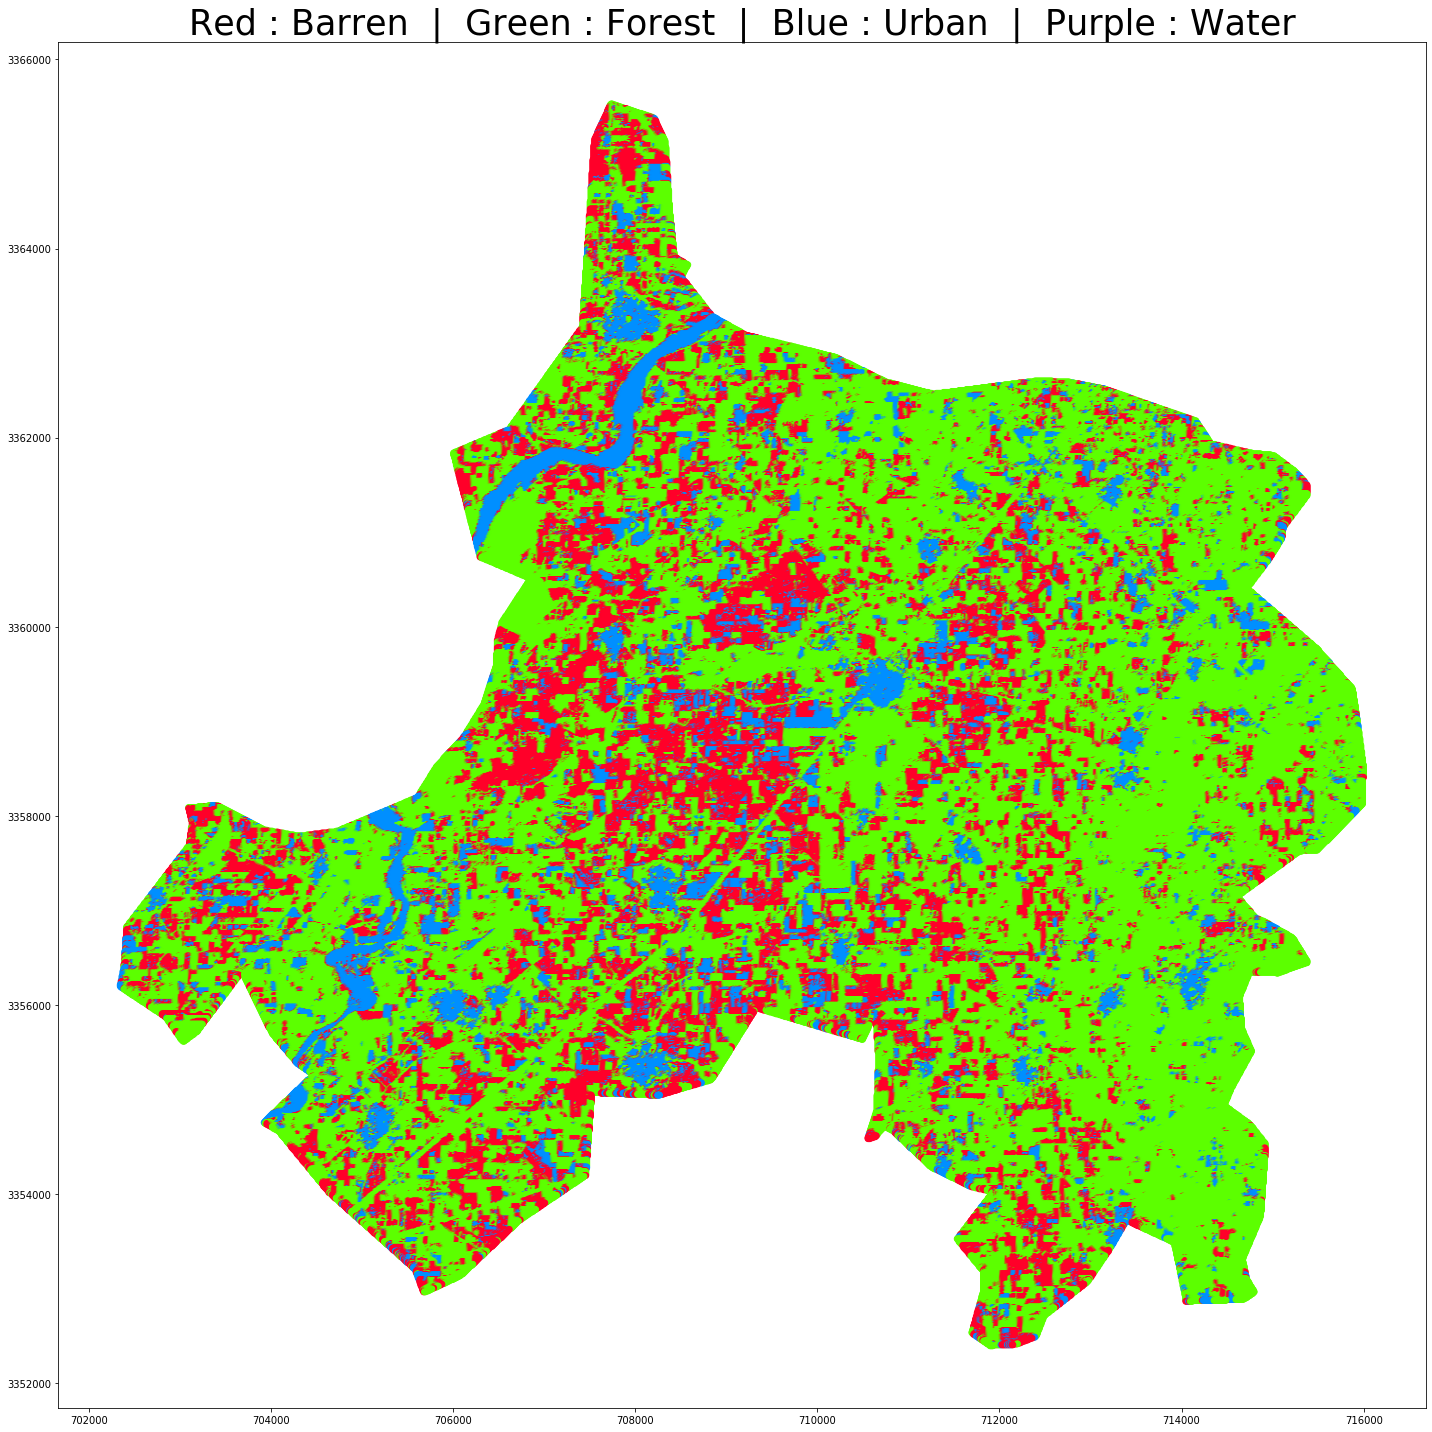

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,20))
plt.scatter(dft['x'] , dft['y'], c=dft['z'], cmap = 'gist_rainbow')
plt.title('Red : Barren  |  Green : Forest  |  Blue : Urban  |  Purple : Water', fontdict = {'fontsize' : 35})
plt.tight_layout()
plt.show()

In [18]:
from PIL import Image
from io import BytesIO
png1 = BytesIO()
fig.savefig(png1, format='png')
png2 = Image.open(png1)
png2.save('final.tif')
png1.close()